In [3]:
%load_ext autoreload
%autoreload 2

In [22]:

import os
import sys
import json

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager

%matplotlib inline

In [5]:
# resource configuration
rcParams['figure.dpi'] = 200

# fount information
rcParams['font.family'] = 'Equinor'
rcParams['font.size'] = 9

# fornt location
font_path = r'Equinor_regular'
font_files = font_manager.findSystemFonts(fontpaths=font_path)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [6]:
# where WellClass and Ga[ codes are located
sys.path.append('../')

In [7]:
# WellClass
# from well_class_v2 import csv_parser, Well
from src.WellClass.libs.utils import (
    csv_parser,
    yaml_parser
)

from src.WellClass.libs.well_class import Well
from src.WellClass.libs.well_pressure import Pressure

# plots
from src.WellClass.libs.plotting import (
    plot_pressure,
    plot_pt,
    plot_sketch,
)

## Some user options

In [8]:
# use yaml or csv input file
use_yaml = True

In [9]:
# pick an example from given three options

case_type = 'cosmo'



# case_type = 'smeaheia_v1'

# case_type = 'smeaheia_v2'

In [10]:
# where pvt located
pvt_path = '../test_data/pvt_constants/'

# Examples

The following are the test examples.

In [11]:
# examples
smeaheia_v1 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/eim/SMEAHEIA', 
               'sim_path': r'../test_data/examples/smeaheia_v1',
               'simcase': r'GEN_NOLGR_PH2'}
smeaheia_v2 = {'well_input': r'GaP_input_Smeaheia_v3.csv', 
               'well_input_yaml': r'smeaheia.yaml', 
            #    'sim_path': r'/scratch/SCS/bkh/wbook/realization-0/iter-0/pflotran/model', 
               'sim_path': r'../test_data/examples/smeaheia_v2', 
               'simcase': r'TEMP-0'}
cosmo = {
         'well_input': r'GaP_input_Cosmo_v3.csv', 
         'well_input_yaml': r'cosmo.yaml', 
        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/cosmo', 
         'simcase': r'TEMP-0'}

sleipner_test = {
         'well_input': r'/scratch/SCS/gpb/SCREEN/cases/Sleipner/GaP_input.csv', 
         'well_input_yaml': r'/scratch/SCS/gpb/SCREEN/cases/Sleipner/well_input.yaml', 

        #  'sim_path': r'/scratch/SCS/bkh/well_class_test1/realization-0/iter-0/pflotran/model', 
         'sim_path': r'../test_data/examples/cosmo', 
         'simcase': r'TEMP-0'}


In [12]:
examples = {
    'smeaheia_v1': smeaheia_v1,
    'smeaheia_v2': smeaheia_v2,
    'cosmo': cosmo,
    'sleipner' : sleipner_test
}

# Load well CSV or yaml configuration file

Process CSV with well class.
Predefine a dictionary that includes the input CSV well file, the simulation path, and the PFT sim case name

In [13]:
# the selected example for testing
case = examples[case_type]


In [14]:

# root_path = '/scratch/SCS/gpb/SCREEN/GaP_code'

sim_path = case['sim_path']


In [15]:
if use_yaml:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input_yaml'])
    
    # # pydantic model
    well_model = yaml_parser(well_name)
    well_csv = json.loads(well_model.spec.model_dump_json())
else:
    # where well configuration file is located
    well_name = os.path.join(sim_path, case['well_input'])

    # load the well information
    well_csv = csv_parser(well_name)

In [16]:
#Process well by running well class
my_well = Well( header       = well_csv['well_header'], 
                drilling     = well_csv['drilling'],
                casings      = well_csv['casing_cement'],
                geology      = well_csv['geology'],
                barriers     = well_csv['barriers'], 
                barrier_perm = well_csv['barrier_permeability'],
                co2_datum    = well_csv['co2_datum'],
           )

cplug3
check_top_int_bottom
0     True
1    False
2    False
3    False
Name: top_msl, dtype: bool
check_bottom_int_bottom
0    True
1    True
2    True
3    True
Name: bottom_msl, dtype: bool

cplug2
check_top_int_bottom
0     True
1     True
2     True
3    False
Name: top_msl, dtype: bool
check_bottom_int_bottom
0    False
1    False
2     True
3     True
Name: bottom_msl, dtype: bool

cplug1
check_top_int_bottom
0     True
1     True
2     True
3    False
Name: top_msl, dtype: bool
check_bottom_int_bottom
0    False
1    False
2     True
3     True
Name: bottom_msl, dtype: bool



In [17]:
my_pressure = Pressure(
    header      = well_csv['well_header'],
    reservoir_P = well_csv['reservoir_pressure'],
    co2_datum   = well_csv['co2_datum'],
    pvt_path    = pvt_path,
)

Hydrostatic pressure at reference depth 2238 is 218.89
RP1 set as hydrostatic P = 218.89 bar
RP2 is set as delta pressure, which yields P = 218.89 +20.00 = 238.89 bar
None ignored
Reference depth: 2238


# Visualization

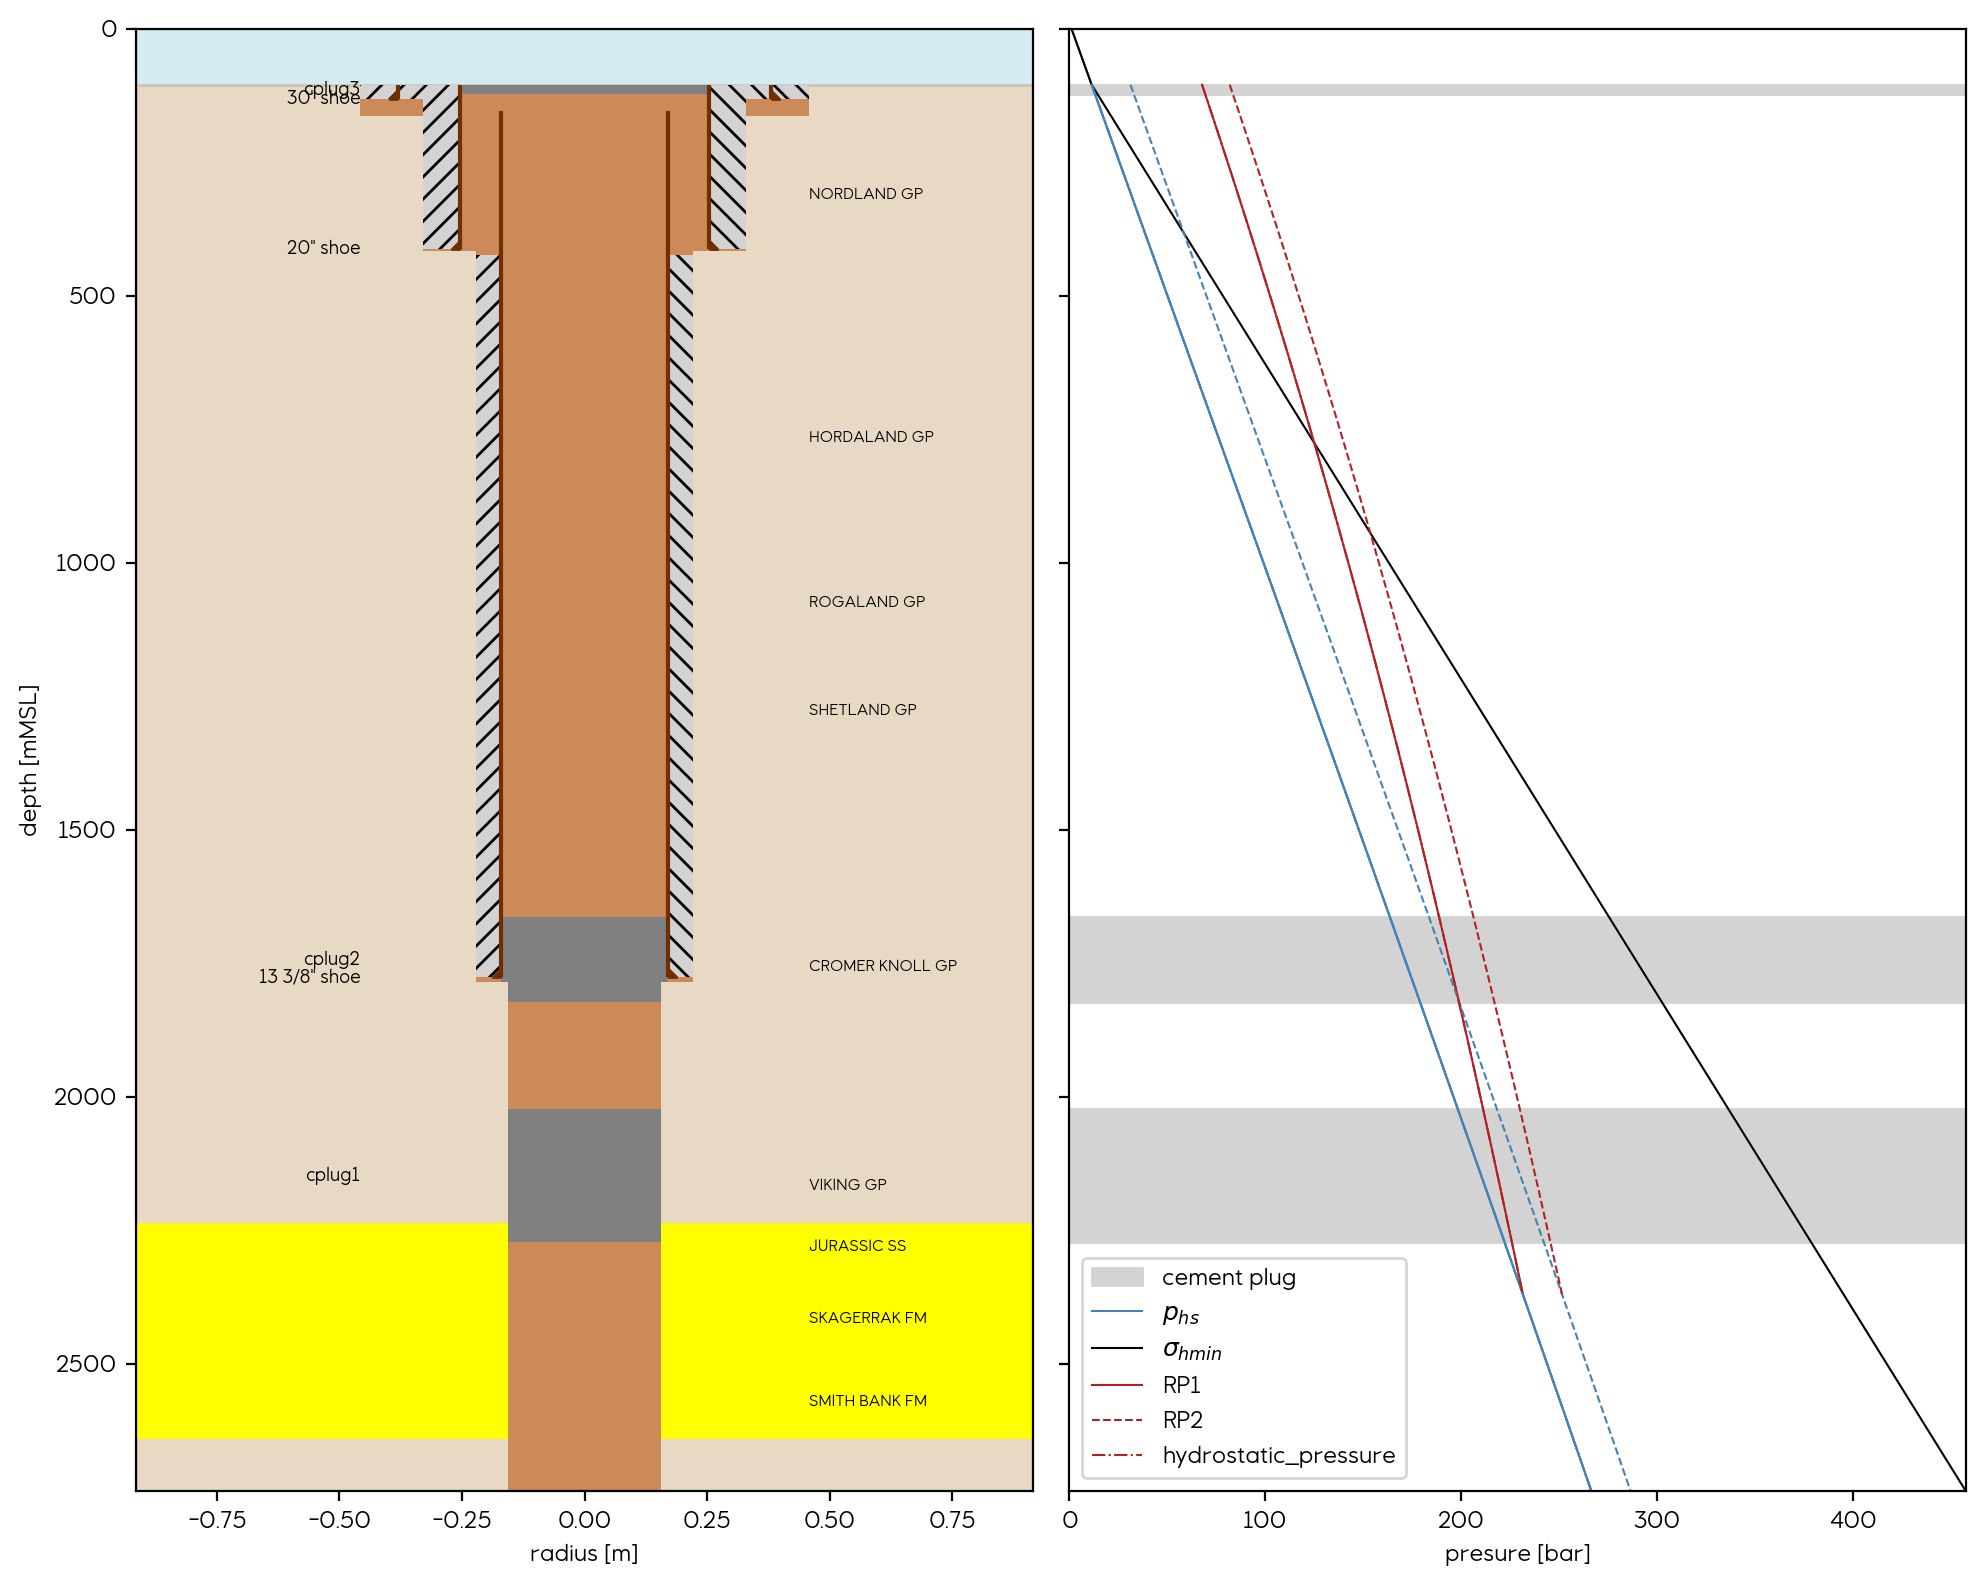

In [18]:
#Plot sketch, pressures
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 8))
plot_sketch(my_well, ax=ax1)
plot_pressure(my_pressure, my_well.geology, my_well.barriers, ax=ax2)

fig.tight_layout()

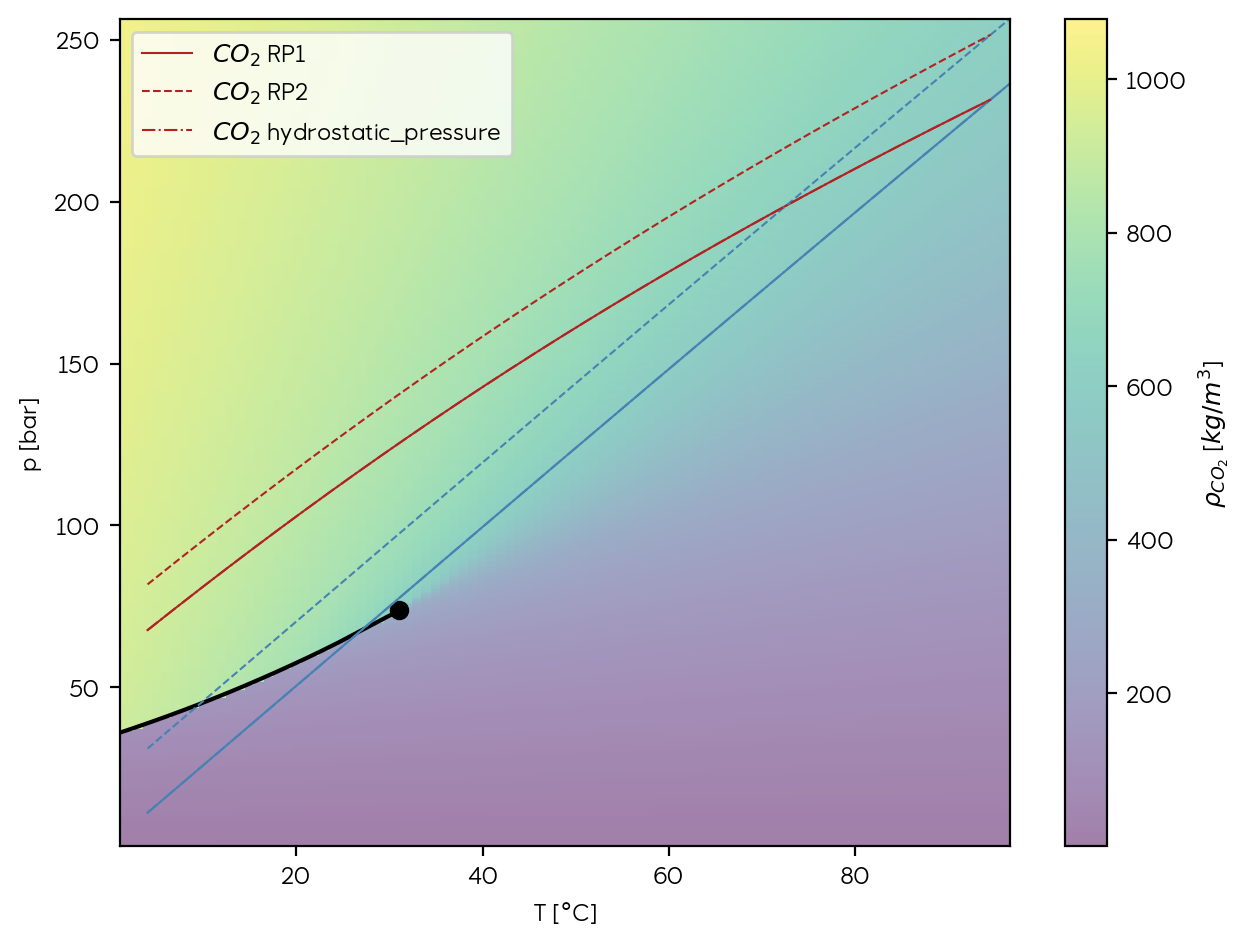

In [17]:
plot_pt(my_pressure)

In [77]:
import random


casings_df = pd.DataFrame(my_well.casings)
drilling_df = pd.DataFrame(my_well.drilling)
cbond_df = pd.DataFrame(my_well.cement_bond)

top_well_msl = my_well.header['sf_depth_msl']
bottom_well_msl = casings_df.bottom_msl.max()



cbond_df


,top_msl,bottom_msl,id_m,od_m
0,423,1776,0.339725,0.4445
1,131,412,0.508000,0.6604
2,105,131,0.508000,0.7620
3,105,131,0.762000,0.9144


130


(-0.9144, 0.9144)

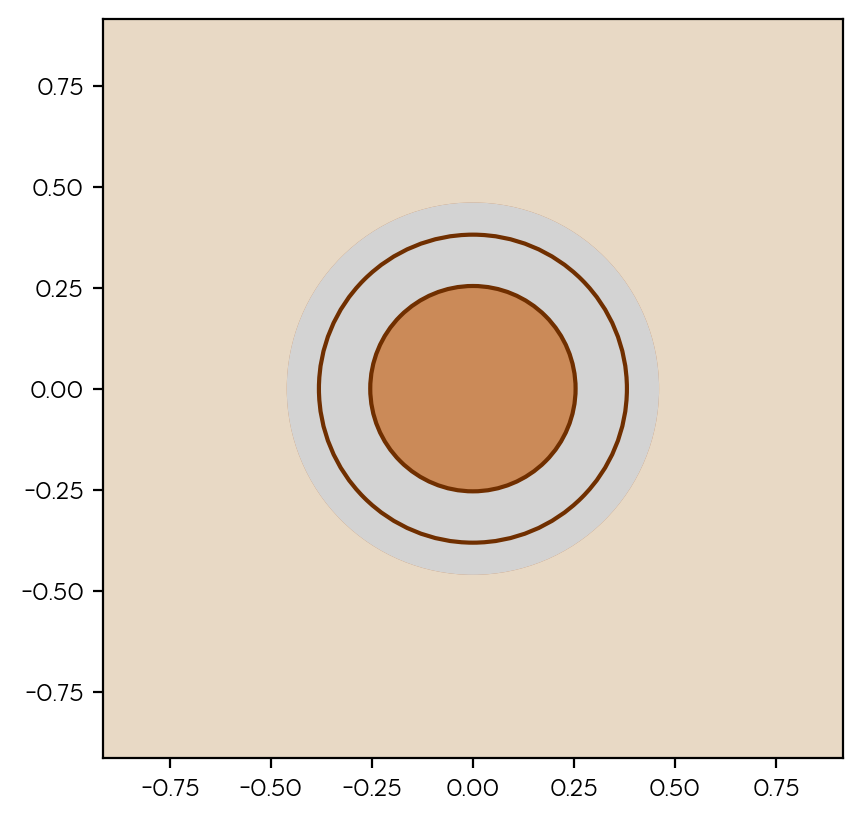

In [96]:


z_value = random.uniform(top_well_msl, bottom_well_msl)
z_value = 130

z_drilling = drilling_df.query('top_msl<=@z_value & bottom_msl>=@z_value')
z_casings = casings_df.query('top_msl<=@z_value & bottom_msl>=@z_value')
z_cbond = cbond_df.query('top_msl<=@z_value & bottom_msl>=@z_value')


# z_barriers = barriers_df.query('top_msl<=@z_value & bottom_msl>=@z_value')

print(z_value)

z_drilling
z_cbond
# z_casings


fig, ax = plt.subplots()


borehole = plt.Circle((0, 0), z_drilling.diameter_m/2, color='#CB8A58')



ax.patch.set_facecolor("tan" )
ax.patch.set_alpha(0.5)
ax.add_patch(borehole)

if z_casings.shape[0] == 0:
        print(f'No casings at {z_value} mRKB')

if z_cbond.shape[0] == 0:
        print(f'No cement bond at {z_value} mRKB')


for idx, row in z_cbond[::-1].iterrows():
        outer = row.od_m/2
        inner = row.id_m/2
        
        c_bond_outer = plt.Circle((0, 0), outer, color='lightgray', hatch='/')

        c_bond_inner = plt.Circle((0, 0), inner, color='#CB8A58')

        ax.add_patch(c_bond_outer)
        ax.add_patch(c_bond_inner)


for idx, row in z_casings.iterrows():

        toc = row.toc_msl
        boc = row.boc_msl

        if toc <= z_value and boc>=z_value:
                c_bond = plt.Circle((0, 0), row.diameter_m/2, edgecolor='k', fill=False)
                casing = plt.Circle((0, 0), row.diameter_m/2, edgecolor='k', fill=False)

        casing = plt.Circle((0, 0), row.diameter_m/2, edgecolor= '#702F00', lw=1.5, fill=False )
        ax.add_patch(casing)


ax.set_aspect(1)

plot_radius = drilling_df.diameter_m.max()

ax.set_xlim(-plot_radius, plot_radius)
ax.set_ylim(-plot_radius, plot_radius)

# if len(z_barriers)>0:
        
#         plug = plt.Circle((0, 0), z_barriers.diameter_m/2, color='gray')
#         ax.add_patch(plug)
